In [130]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from os import chdir
chdir('/home/walrus/diveindata/')

import diveindata as dv

In [134]:
import imp

imp.reload(dv)

<module 'diveindata' from '/home/walrus/diveindata/diveindata/__init__.py'>

In [146]:
terror = dv.DataInfo('/home/walrus/diveindata/data/globalterrorismdb_0616dist.csv', params={'encoding': 'latin1'})

/home/walrus/.virtualenvs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Columns metadata and basic stats

In [35]:
terror.columns

{'INT_ANY': {'idxmin': -9,
  'max': 1,
  'mean': -4.2211236700431201,
  'min': -9,
  'std': 4.6861425686833682,
  'sum': -661754,
  'type': 'INT',
  'uniques': 3},
 'INT_IDEO': {'idxmin': -9,
  'max': 1,
  'mean': -4.7891141275227715,
  'min': -9,
  'std': 4.5897788910995079,
  'sum': -750799,
  'type': 'INT',
  'uniques': 3},
 'INT_LOG': {'idxmin': -9,
  'max': 1,
  'mean': -4.834645217258184,
  'min': -9,
  'std': 4.5288624534878359,
  'sum': -757937,
  'type': 'INT',
  'uniques': 3},
 'INT_MISC': {'idxmin': -9,
  'max': 1,
  'mean': 0.093894317862883672,
  'min': -9,
  'std': 0.60244188893120521,
  'sum': 14720,
  'type': 'INT',
  'uniques': 3},
 'addnotes': {'type': 'CATEGORY', 'uniques': 12762},
 'alternative': {'equivalents': ['alternative_txt'],
  'has_equivalent': True,
  'idxmin': 1.0,
  'max': 5.0,
  'mean': 1.2989354678989933,
  'min': 1.0,
  'std': 0.68227016215906133,
  'sum': 31481.0,
  'type': 'FLOAT',
  'uniques': 6},
 'alternative_txt': {'equivalents': ['alternative'],

In [36]:
terror.columns['nkill']

{'idxmin': 0.0,
 'max': 1500.0,
 'mean': 2.3592374870502684,
 'min': 0.0,
 'std': 11.42127034765741,
 'sum': 348758.99999818002,
 'type': 'FLOAT',
 'uniques': 339}

In [37]:
terror.columns['country_txt']

{'equivalents': ['country'],
 'has_equivalent': True,
 'type': 'CATEGORY',
 'uniques': 206}

# Group by region

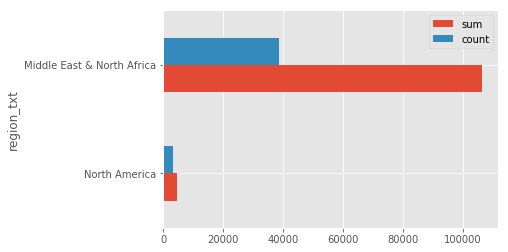

In [179]:
terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa'])], 'nkill', aggs=['sum', 'count']).plot.barh()

# Filter a list of regions

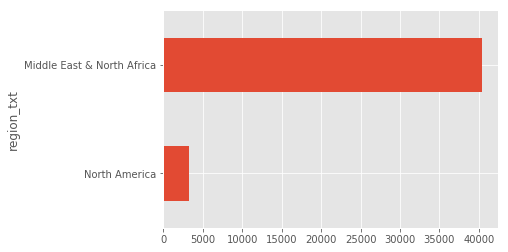

In [37]:
terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa'])]).plot.barh()

# Select multiple columns

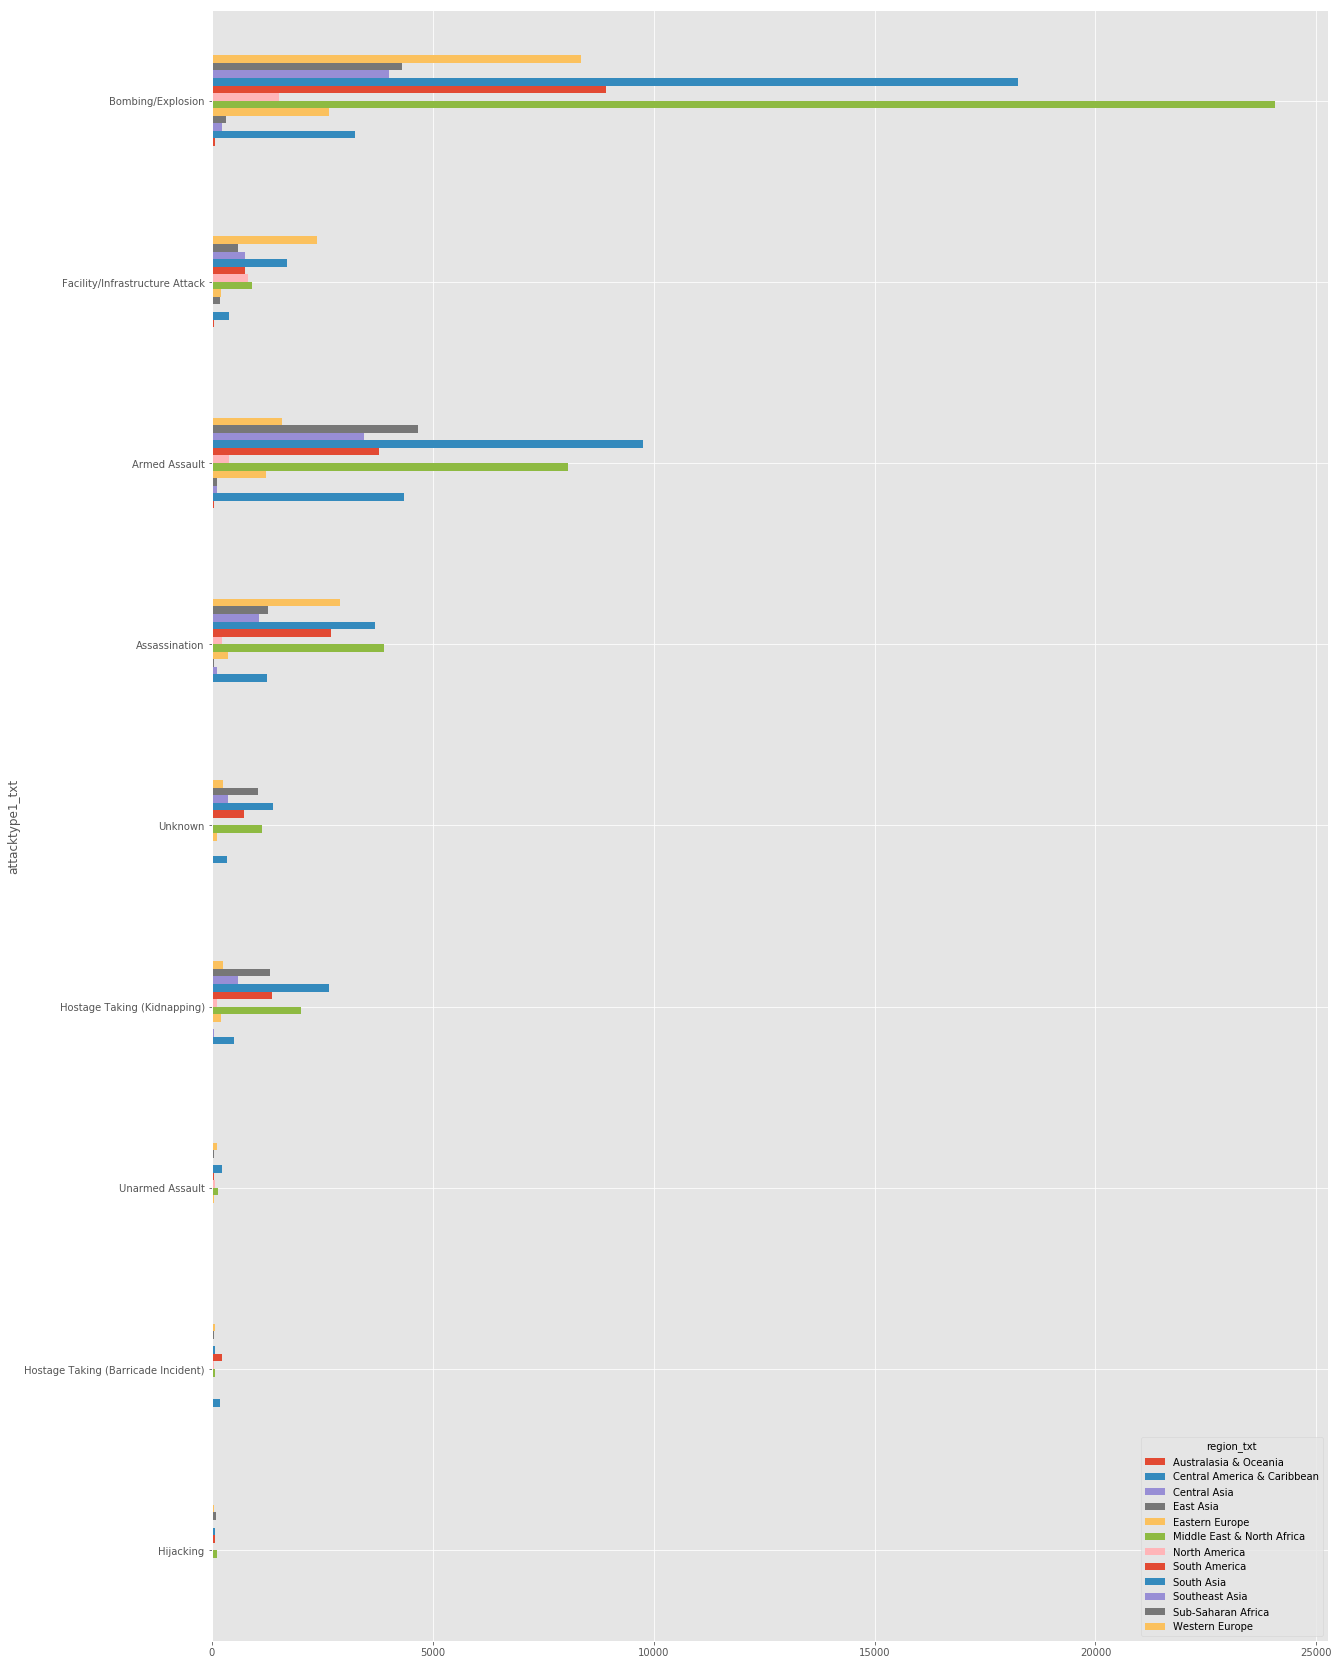

In [147]:
# If 'level = 1' we use column 1 ('arracktype1_txt') for the groups

tbg = terror.bar_groups(['region_txt', 'attacktype1_txt']).plot.barh(figsize=(20,30))

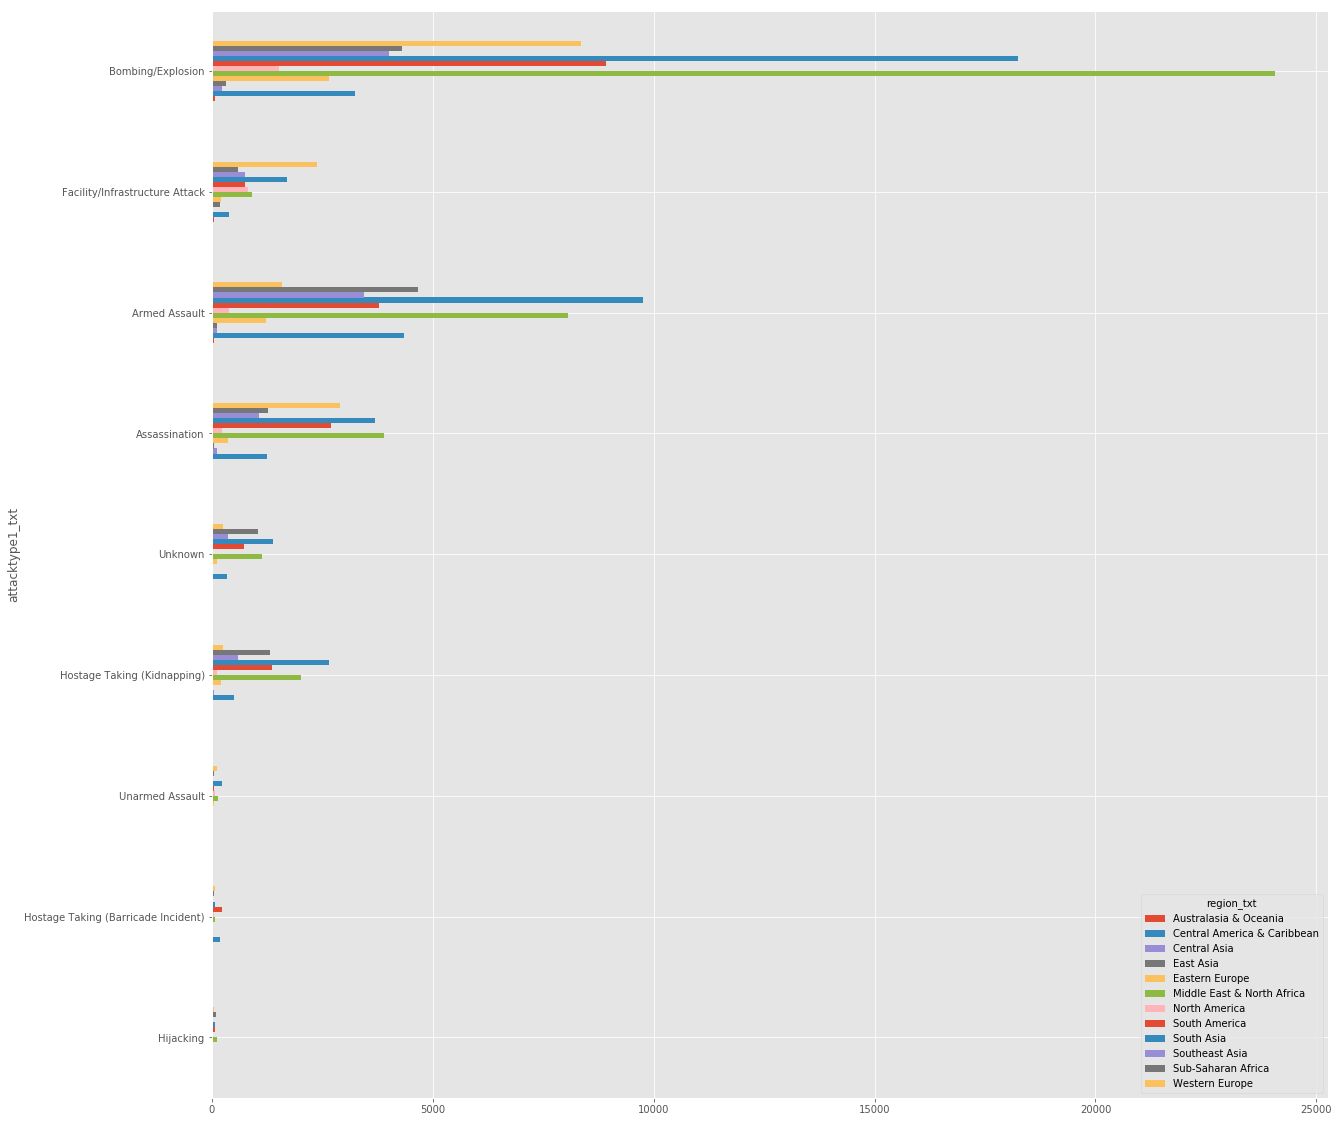

In [148]:
# If 'level = 0' we use column 0 ('region_txt') for the groups

tbg = terror.bar_groups(['region_txt', 'attacktype1_txt']).plot.barh(figsize=(20,20))

# Multiple columns and filtering

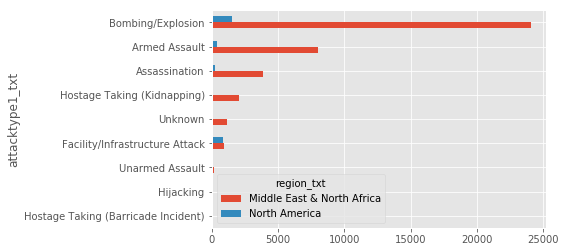

In [149]:
tbg =terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa']), 'attacktype1_txt']).plot.barh()

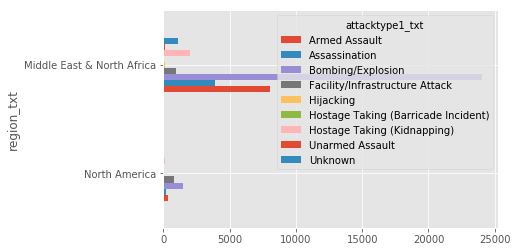

In [152]:
tbg = terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa']), 'attacktype1_txt'], level=1).plot.barh()

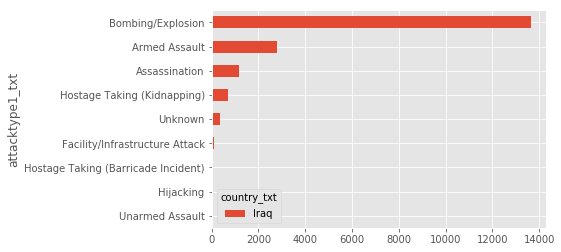

In [153]:
tbg = terror.bar_groups([('country_txt', 'Iraq'), 'attacktype1_txt']).plot.barh()

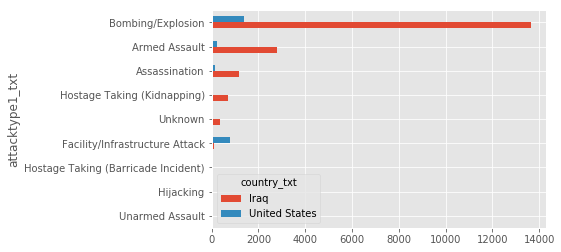

In [154]:
tbg = terror.bar_groups([('country_txt', ['Iraq', 'United States']), 'attacktype1_txt']).plot.barh()

# Select another column to calculate

By default the bar graph is going to display the count of entries in a given category. If you pass a column name, it is going to use it for the weight of the bar.

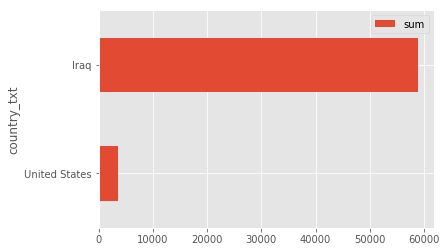

In [67]:
terror.bar_groups([('country_txt', ['Iraq', 'United States'])], 'nkill').plot.barh()

The default is to sum the values in this column, if you want other types of aggregation, you can pass a argument 'aggs' with possible values as ['sum', 'count', 'mean', 'std']:

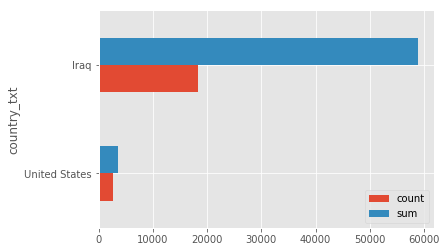

In [68]:
terror.bar_groups([('country_txt', ['Iraq', 'United States'])], 'nkill', aggs=['count', 'sum']).plot.barh()

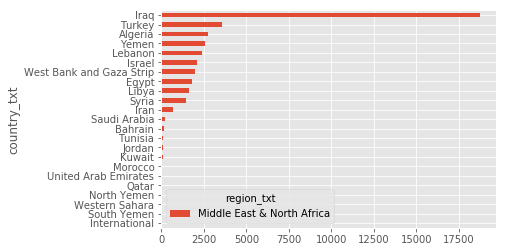

In [155]:
tbg = terror.bar_groups([('region_txt', 'Middle East & North Africa'), 'country_txt']).plot.barh()

In [16]:
terror.data.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'], dtype=object)

In [22]:
us = terror.bar_groups([('region_txt', 'Middle East & North Africa'), 'country_txt']).unstack(level=0)

In [27]:
us.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

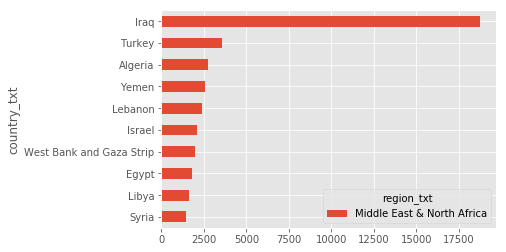

In [42]:
us.sort_values(us.columns[0])[-10:].plot.barh()

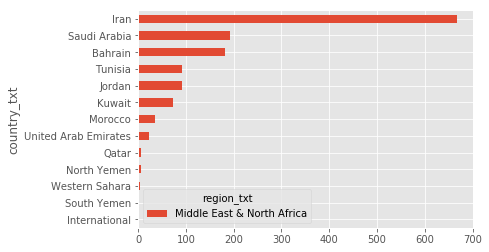

In [45]:
us.sort_values(us.columns[0])[:-10].plot.barh()

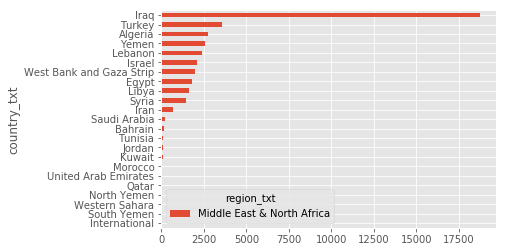

In [46]:
us.sort_values(us.columns[0]).plot.barh()

In [186]:
polkil = dv.DataInfo('/home/walrus/redi/data-analysis/Project/database.csv')

In [70]:
polkil.columns

{'age': {'idxmin': 6.0,
  'max': 86.0,
  'mean': 36.484516436398287,
  'min': 6.0,
  'std': 12.873999758163912,
  'sum': 76581.0,
  'type': 'FLOAT',
  'uniques': 72},
 'armed': {'type': 'CATEGORY', 'uniques': 65},
 'body_camera': {'idxmin': False,
  'max': True,
  'mean': 0.1069094304388422,
  'min': False,
  'std': 0.30907021858111955,
  'sum': 229,
  'type': 'INT',
  'uniques': 2},
 'city': {'type': 'CATEGORY', 'uniques': 1247},
 'date': {'type': 'CATEGORY', 'uniques': 739},
 'flee': {'type': 'CATEGORY', 'uniques': 5},
 'gender': {'type': 'CATEGORY', 'uniques': 3},
 'id': {'type': 'UNIQUE', 'uniques': 2142},
 'manner_of_death': {'type': 'CATEGORY', 'uniques': 2},
 'name': {'type': 'CATEGORY', 'uniques': 2119},
 'race': {'type': 'CATEGORY', 'uniques': 7},
 'signs_of_mental_illness': {'idxmin': False,
  'max': True,
  'mean': 0.24743230625583568,
  'min': False,
  'std': 0.43162082114768874,
  'sum': 530,
  'type': 'INT',
  'uniques': 2},
 'state': {'type': 'CATEGORY', 'uniques': 51},


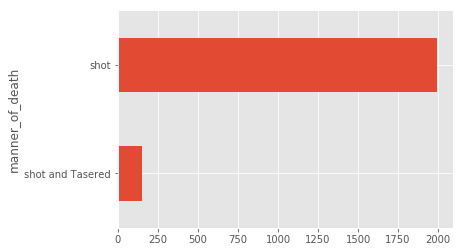

In [118]:
polkil.bar_groups(['manner_of_death']).plot.barh()

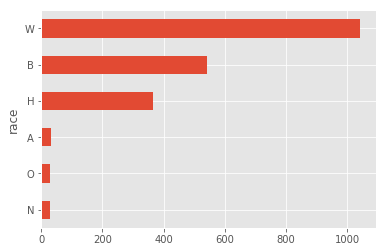

In [109]:
polkil.bar_groups(['race']).plot.barh()

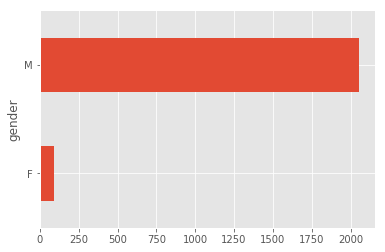

In [80]:
polkil.bar_groups(['gender']).plot.barh()

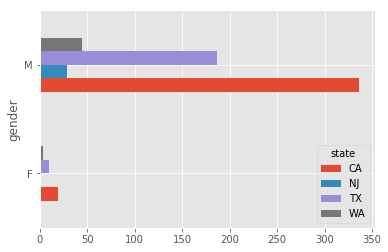

In [144]:
polkil.bar_groups([('state', ['TX', 'CA', 'WA', 'NJ']), 'gender']).plot.barh()

In [89]:
polkil.data.state.unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [95]:
polkil.data[polkil.data.state == 'TX']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
20,325,Andy Martinez,2015-01-09,shot,gun,33.0,M,H,El Paso,TX,False,attack,Not fleeing,False
25,48,Richard McClendon,2015-01-13,shot,knife,43.0,M,W,Jourdanton,TX,True,other,Not fleeing,False
30,54,Robert Edwards,2015-01-14,shot,gun,68.0,M,W,Lake Jackson,TX,False,attack,Not fleeing,False
37,67,Scott Hall,2015-01-16,shot,gun,41.0,M,W,Mabank,TX,False,attack,Car,False
41,78,Daniel Brumley,2015-01-17,shot,knife,27.0,M,H,Fort Worth,TX,False,attack,Not fleeing,False
47,88,Miguel Angel de Santos-Rodriguez,2015-01-21,shot,gun,36.0,M,H,Chapeno,TX,False,attack,Foot,False
50,99,Tiano Meton,2015-01-22,shot,toy weapon,25.0,M,B,Sierra Blanca,TX,False,attack,Car,False
51,100,Kristiana Coignard,2015-01-22,shot and Tasered,knife,17.0,F,W,Longview,TX,True,other,Not fleeing,False
52,336,Robert Francis Mesch,2015-01-23,shot,gun,61.0,M,W,Austin,TX,True,attack,Not fleeing,False


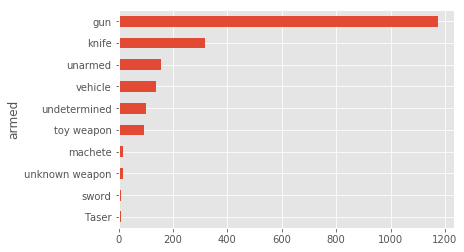

In [168]:
polkil.bar_groups(['armed'])[-10:].plot.barh()

In [182]:
terror.data.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua', 'Netherlands',
       'Belgium', 'Israel', 'Canada', 'Australia', 'Pakistan', 'Zambia',
       'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia', 'Taiwan',
       'Panama', 'Kuwait', 'West Bank and Gaza Strip', 'Austria',
       'Czechoslovakia', 'India', 'France', 'South Vietnam', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras', 'Yugoslavia',
       'Ecuador', 'New Zealand', 'Zaire', 'Portugal', 'Malaysia',
       'Singapore', 'Botswana', 'Jamaica', 'Chad', 'North Yemen',
       'Andorra', 'Syria',

In [187]:
polkil.columns_by_type('CATEGORY')

['name',
 'date',
 'manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [190]:
polkil.columns_by_type(['INT', 'FLOAT'])



['age', 'signs_of_mental_illness', 'body_camera']

In [208]:
imp.reload(dv)

<module 'diveindata' from '/home/walrus/diveindata/diveindata/__init__.py'>

In [191]:
polkil.columns

{'age': {'idxmin': 6.0,
  'max': 86.0,
  'mean': 36.48451643639829,
  'min': 6.0,
  'std': 12.873999758163912,
  'sum': 76581.0,
  'type': 'FLOAT',
  'uniques': 72},
 'armed': {'type': 'CATEGORY', 'uniques': 65},
 'body_camera': {'idxmin': 0.0,
  'max': 1.0,
  'mean': 0.1069094304388422,
  'min': 0.0,
  'std': 0.30907021858111955,
  'sum': 229.0,
  'type': 'INT',
  'uniques': 2},
 'city': {'type': 'CATEGORY', 'uniques': 1247},
 'date': {'type': 'CATEGORY', 'uniques': 739},
 'flee': {'type': 'CATEGORY', 'uniques': 5},
 'gender': {'type': 'CATEGORY', 'uniques': 3},
 'id': {'type': 'UNIQUE', 'uniques': 2142},
 'manner_of_death': {'type': 'CATEGORY', 'uniques': 2},
 'name': {'type': 'CATEGORY', 'uniques': 2119},
 'race': {'type': 'CATEGORY', 'uniques': 7},
 'signs_of_mental_illness': {'idxmin': 0.0,
  'max': 1.0,
  'mean': 0.24743230625583568,
  'min': 0.0,
  'std': 0.43162082114768874,
  'sum': 530.0,
  'type': 'INT',
  'uniques': 2},
 'state': {'type': 'CATEGORY', 'uniques': 51},
 'threa

In [274]:
polkil.bar_groups([('state', ['CA','TX']), 'armed']).plot.barh()

SyntaxError: invalid syntax (<unknown>, line 1)

In [302]:
polkil.data.armed.value_counts()

gun                                 1173
knife                                319
unarmed                              155
vehicle                              136
undetermined                         101
toy weapon                            92
machete                               16
unknown weapon                        14
sword                                  8
baseball bat                           7
Taser                                  7
box cutter                             7
metal pipe                             7
hammer                                 7
ax                                     6
hatchet                                6
gun and knife                          5
crossbow                               4
screwdriver                            4
guns and explosives                    3
metal stick                            3
scissors                               3
blunt object                           3
metal pole                             2
baton           

data.query('(armed == "shovel" | armed == "toy weapon")&(state == "CA" | state == "TX")').groupby(['armed', 'state']).size().sort_values(na_position='first').unstack(level=0).sort_values(by=['shovel', 'toy weapon'], na_position='first')


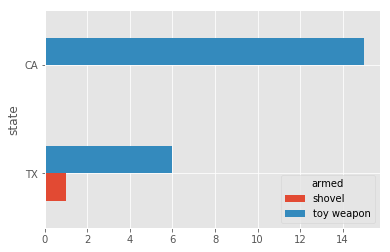

In [298]:
pg = polkil.bar_groups([('armed', ['shovel', 'toy weapon']), ('state', ['CA','TX'])])
pg.plot.barh()

In [277]:
polkil = dv.DataInfo('/home/walrus/redi/data-analysis/Project/database.csv')

In [276]:
imp.reload(dv)

<module 'diveindata' from '/home/walrus/diveindata/diveindata/__init__.py'>

In [268]:
polkil.data.query('(state == "CA" | state == "TX")').groupby(['state', 'armed']).size().sort_values(by=['CA', 'TX'],na_position='first').unstack(level=0)

TypeError: sort_values() got an unexpected keyword argument 'by'

In [237]:
pg = polkil.data.query('(state == "CA" | state == "TX")').groupby(['state', 'armed']).size().unstack(level=0)

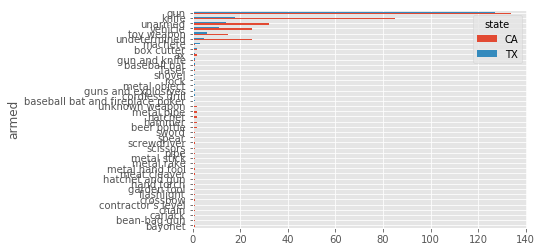

In [242]:
pg.sort_values(by=['TX', 'CA'], na_position='first').plot.barh()

In [245]:
list(pg.columns)

['CA', 'TX']

In [246]:
pg = polkil.data.query('(state == "CA" | state == "TX")').groupby(['state', 'armed']).size().unstack(level=0)

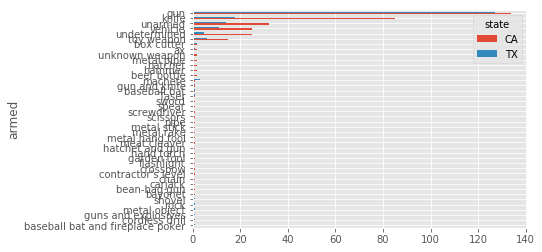

In [255]:
polkil.data.query('(state == "CA" | state == "TX")').groupby(['state', 'armed']).size().sort_values(na_position='first').unstack(level=0).sort_values(by=['CA', 'TX'], na_position='first').plot.barh()